In [1]:
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from keras import models
from keras import layers

In [2]:
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf
from sklearn.metrics import accuracy_score, confusion_matrix


In [17]:
df = pd.read_csv('Labeled Data/data_labelling_comments.csv', header=0)
#df = df.iloc[2:]
#df1 = df.tail(-2)
df1 = df[['text', 'label']]
df1

,text,label
0,"Mmmm yes, forward thinking, like underground t...",-1
1,Probably not. It's like if attaching horse to ...,0
2,Cool in any decade ever! A rocket going to spa...,1
3,"He is on of the most famous people out there, ...",1
4,The **average** rent for an apartment in Los A...,1
...,...,...
198,"Licence to print money after, I'll line up to ...",1
199,That’s not good,-1
200,[Betteridge's law](https://en.wikipedia.org/wi...,0
201,"Tedros is just jerking off China, at their com...",-1


In [26]:
from sklearn.model_selection import train_test_split

#X = data.drop('class', axis=1)
#X = df1[['title', 'upvotes', 'downvotes', 'score', 'label']]
X = df1['text']
y = df1['label']


#display(y.to_string())

In [27]:
#random_state is the seed used in randomising grouping
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, random_state=16
)


In [28]:
from keras.utils import to_categorical
one_hot_label = to_categorical(y_train, num_classes=3)
y_train = one_hot_label
ohl = to_categorical(y_test, num_classes=3)
y_test = ohl

In [13]:
X_train

197    Did he said the pandemic was ending in few wee...
192    Glad to see the Elon sycophants and right-wing...
180    The WHO and WEF are just modern villains most ...
156    I think a lot of people do unfortunately. For ...
181    Doctor here. Tell me more about the WHO’s fail...
                             ...                        
123    Having a WHO with information from 194 member ...
65     But the organisation would be worse without Ch...
69                                 I will never give up.
121    So naïve. If covid response is so A political ...
169    Yeah, pretty sure each one of those claims is ...
Name: text, Length: 162, dtype: object

In [29]:
y_train

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0

In [30]:
y_test

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [31]:
from keras.preprocessing.text import Tokenizer
# create the tokenizer to tokenize each word
tokenizer = Tokenizer()

# fit the tokenizer on the documents
tokenizer.fit_on_texts(X_train)
# encode training data set
X_train = tokenizer.texts_to_matrix(X_train, mode='count')

# encode training data set
X_test = tokenizer.texts_to_matrix(X_test, mode='count')

n_words1 = X_test.shape[1]

In [32]:
n_words1

1789

<h1>For binary

In [ ]:
model = tf.keras.models.Sequential([
       
    tf.keras.layers.Dense(256, input_shape=(n_words1,), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
          
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.03),
              metrics=['acc'])

callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)]

history = model.fit(X_train, y_train,
                    epochs=15,
                    validation_data=(X_test, y_test,),
                    verbose=1,
                    callbacks=callbacks,
                   )

<h1> For multi class

In [34]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Dense(512, input_shape=(n_words1,), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
       
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(3, activation='softmax')
])

#use categorical cos not binary
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.003),
              metrics=['acc'])

callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)]

history = model.fit(X_train, y_train,
                    epochs=30,
                    validation_data=(X_test, y_test,),
                    verbose=1,
                    #callbacks=callbacks,
                   )

Epoch 1/30
6/6 [==============================] - 1s 53ms/step - loss: 1.5599 - acc: 0.3704 - val_loss: 1.0813 - val_acc: 0.4878
Epoch 2/30
6/6 [==============================] - 0s 22ms/step - loss: 1.7178 - acc: 0.3765 - val_loss: 1.0242 - val_acc: 0.5366
Epoch 3/30
6/6 [==============================] - 0s 14ms/step - loss: 1.3408 - acc: 0.4074 - val_loss: 1.0042 - val_acc: 0.5122
Epoch 4/30
6/6 [==============================] - 0s 14ms/step - loss: 1.2944 - acc: 0.4074 - val_loss: 0.9880 - val_acc: 0.4878
Epoch 5/30
6/6 [==============================] - 0s 15ms/step - loss: 1.2286 - acc: 0.4630 - val_loss: 0.9727 - val_acc: 0.6341
Epoch 6/30
6/6 [==============================] - 0s 13ms/step - loss: 0.9605 - acc: 0.5309 - val_loss: 0.9517 - val_acc: 0.6098
Epoch 7/30
6/6 [==============================] - 0s 13ms/step - loss: 1.1349 - acc: 0.5123 - val_loss: 0.9343 - val_acc: 0.6098
Epoch 8/30
6/6 [==============================] - 0s 13ms/step - loss: 1.0244 - acc: 0.5309 - val

In [35]:
import matplotlib.pyplot as plt

def plot_history(history):
    accuracy = history.history['acc']
    val_accuracy = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1,len(accuracy) + 1)
    
    # Plot accuracy  
    plt.figure(1)
    plt.plot(epochs, accuracy, 'b', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'g', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot loss
    plt.figure(2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'g', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


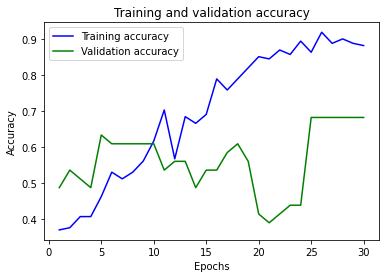

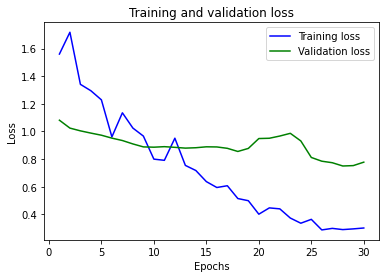

In [36]:
plot_history(history)

In [ ]:
df = pd.read_csv('comments.csv')
df